In [1]:
!pip install -q tfds-nightly tensorflow-datasets tensorflow matplotlib

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\tensorflow_datasets\\__init__.py'
Consider using the `--user` option or check the permissions.



In [2]:
import tensorflow as tf
import cv2
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import sklearn
import math
import pandas as pd

In [3]:
ds = tfds.as_numpy(tfds.load('deep_weeds', as_supervised = True, shuffle_files = True, batch_size = -1))

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [4]:
images, label = ds['train']

In [5]:
images[0]

array([[[200, 213, 230],
        [213, 225, 239],
        [245, 255, 255],
        ...,
        [ 85, 127, 107],
        [ 62,  67,  63],
        [ 77,  65,  67]],

       [[199, 212, 229],
        [224, 236, 250],
        [232, 242, 251],
        ...,
        [ 52,  89,  72],
        [ 61,  66,  62],
        [ 81,  69,  71]],

       [[158, 170, 186],
        [230, 242, 255],
        [247, 255, 255],
        ...,
        [180, 206, 195],
        [123, 125, 122],
        [ 84,  73,  77]],

       ...,

       [[ 33,  36,  43],
        [ 33,  36,  43],
        [ 31,  35,  44],
        ...,
        [186, 192, 206],
        [ 68,  74,  88],
        [ 88,  94, 108]],

       [[ 36,  36,  44],
        [ 33,  36,  43],
        [ 31,  35,  44],
        ...,
        [103, 109, 123],
        [ 94, 100, 114],
        [ 58,  64,  78]],

       [[ 36,  36,  44],
        [ 33,  36,  43],
        [ 32,  35,  44],
        ...,
        [ 26,  32,  46],
        [ 20,  26,  40],
        [138, 144, 158]]

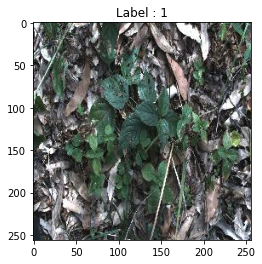

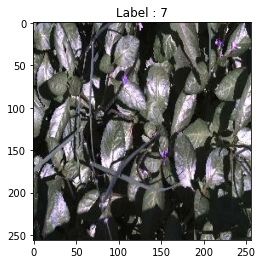

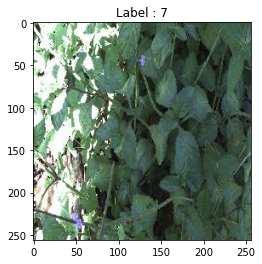

In [6]:
#Check some images
for i in range(3):
    fig , ax = plt.subplots()
    ax.imshow(images[i])
    ax.set_title("Label : " + str(label[i]))

In [7]:
img_0 = images[np.where(label == 0)]
img_1 = images[np.where(label == 1)]
img_2 = images[np.where(label == 2)]
img_3 = images[np.where(label == 3)]
img_4 = images[np.where(label == 4)]
img_5 = images[np.where(label == 5)]
img_6 = images[np.where(label == 6)]
img_7 = images[np.where(label == 7)]
img_8 = images[np.where(label == 8)]

img_sorted = [img_0, img_1, img_2, img_3, img_4, img_5, img_6, img_7, img_8]

<Figure size 2880x2880 with 0 Axes>

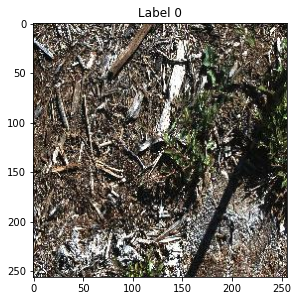

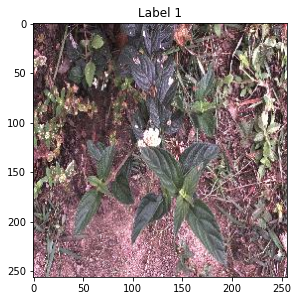

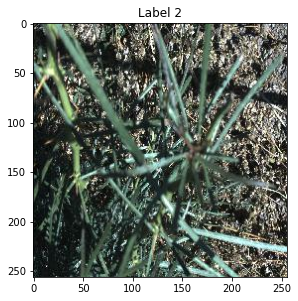

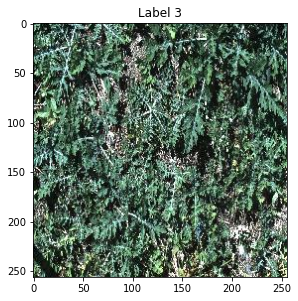

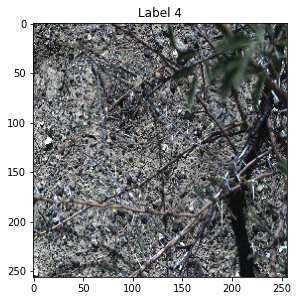

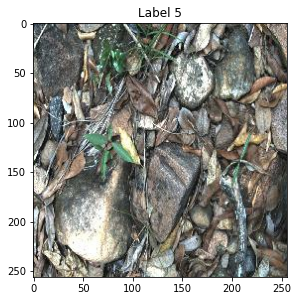

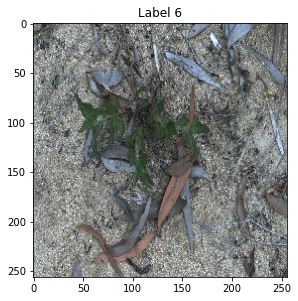

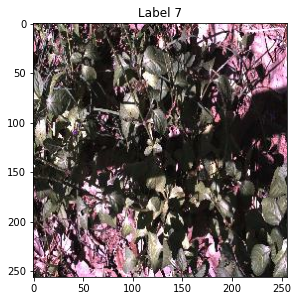

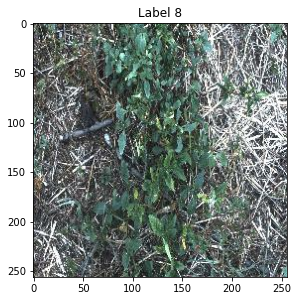

In [8]:
fig = plt.figure(figsize = (40,40))

for i in range(9):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img_sorted[i][np.random.randint(0,500)])
    ax.set_title(f"Label {i}")

In [9]:
def normalize_img(img):
    return img/255

In [10]:
def re_size(img, new_size):
    return cv2.resize(img, new_size)

# for i in range(len(img_sorted)):
#     fig = plt.figure(figsize = (10,10))
#     ax = fig.add_subplot(1,2,1)
#     n = np.random.randint(0,500)
#     plt.imshow(img_sorted[i][n])
#     ax.set_title(f"Label {i} Before")

#     ax = fig.add_subplot(1,2,2)
#     plt.imshow(re_size(img_sorted[i][n], (180,180)))
#     ax.set_title(f"Label {i} After")

In [11]:
def conv_greyscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# for i in range(len(img_sorted)):
#     fig = plt.figure(figsize = (10,10))
#     ax = fig.add_subplot(1,2,1)
#     n = np.random.randint(0,500)
#     plt.imshow(img_sorted[i][n])
#     ax.set_title(f"Label {i} Before ")



#     ax = fig.add_subplot(1,2,2)
#     plt.imshow(conv_greyscale(img_sorted[i][n]), cmap = 'gray')
#     ax.set_title(f"Label {i} After")

In [12]:
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return img_output

# for i in range(len(img_sorted)):
#     img = img_sorted[i][np.random.randint(0,500)]
    
#     fig = plt.figure(figsize = (10,10))
#     ax = fig.add_subplot(1,2,1)
#     plt.imshow(img)
#     ax.set_title("Before")

#     img_output = histogram_equalization(img)

#     ax = fig.add_subplot(1,2,2)
#     plt.imshow(img_output)
#     ax.set_title("After")

In [13]:
# def gaussian_filter(img, kernel_size):
#     return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# def median_filter(img, kernel_size):
#     return cv2.medianBlur(img, kernel_size)

# def box_filter(img, kernel_size):
#     return cv2.blur(img , (kernel_size, kernel_size))


# for i in range(len(img_sorted)):
#     img = img_sorted[i][np.random.randint(0,500)]
#     fig = plt.figure(figsize = (20,20))
#     ax = fig.add_subplot(1,4,1)
#     plt.imshow(img)
#     ax.set_title(f"Label {i} Before")
    
#     gaussian = gaussian_filter(img, 5)
#     median = median_filter(img , 5)
#     box = box_filter(img , 5)
    
    
#     ax = fig.add_subplot(1,4,2)
#     plt.imshow(gaussian)
#     ax.set_title("Gaussian")
    
#     ax = fig.add_subplot(1,4,3)
#     plt.imshow(median)
#     ax.set_title("Median")
    
#     ax = fig.add_subplot(1,4,4)
#     plt.imshow(box)
#     ax.set_title("Box")

In [14]:
def sobel_filter(img, kernel_size):
    sobelx = cv2.Sobel(img, cv2.CV_64F,1,0, ksize = kernel_size)
    sobely = cv2.Sobel(img, cv2.CV_64F,0,1, ksize = kernel_size)
    sobel = np.sqrt(sobelx**2 + sobely**2)
    norm = np.linalg.norm(sobel)
    sobel = (sobel/norm) * 256
    return sobel

def laplacian_filter(img):
    return cv2.Laplacian(img, cv2.CV_64F)

# for i in range(len(img_sorted)):
#     img = img_sorted[i][np.random.randint(0,500)]
#     img = conv_greyscale(img)
#     fig = plt.figure(figsize = (25,25))
#     ax = fig.add_subplot(1,3,1)
#     plt.imshow(img, cmap = 'gray')
#     ax.set_title(f"Label {i} Before")
    
#     sobel = sobel_filter(img, 5)
#     laplacian = laplacian_filter(img)
    
#     ax = fig.add_subplot(1,3,2)
#     plt.imshow(sobel, cmap = 'gray')
#     ax.set_title("Sobel")
    
#     ax = fig.add_subplot(1,3,3)
#     plt.imshow(laplacian, cmap = 'gray')
#     ax.set_title("Laplacian")

PreProcessing 

1) Histogram Equalize each image

In [15]:
vfunc = np.vectorize(histogram_equalization)
for i in range(9):
  temp = img_sorted[i]
  s = temp.shape
  for j in range(s[0]):
    img_sorted[i][j] = histogram_equalization(img_sorted[i][j])

In [16]:
rgb_mean_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.mean(j))
  temp = np.array(temp)
  rgb_mean_sorted.append(temp)


In [17]:
average_intensity_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.mean(conv_greyscale(j)))
  temp = np.array(temp)
  average_intensity_sorted.append(temp)


In [18]:
histogram_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(cv2.calcHist([conv_greyscale(j)], [0], None, [256], [0, 256]))
  temp = np.array(temp)
  histogram_sorted.append(temp)


In [19]:
laplace_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.mean(laplacian_filter(j)))
  temp = np.array(temp)
  laplace_sorted.append(temp)

In [20]:
edge_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.mean(sobel_filter(j,3)))
  temp = np.array(temp)
  edge_sorted.append(temp)

In [24]:
from itertools import product
from scipy.signal import convolve
# cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype)
# ksize - size of gabor filter (n, n)
# sigma - standard deviation of the gaussian function
# theta - orientation of the normal to the parallel stripes
# lambda - wavelength of the sunusoidal factor
# gamma - spatial aspect ratio
# psi - phase offset
# ktype - type and range of values that each pixel in the gabor kernel can hold

ksize = (5,5)
sigma = np.arange(1,4)
theta = (0, np.pi/4, np.pi/2, np.pi)
lambd = np.arange(1,4)

params = list(product(sigma, theta, lambd))

filterbank = [cv2.getGaborKernel(ksize, param[0], param[1], param[2], 0.5, 0, ktype=cv2.CV_32F) for param in params]

gabor_response_sorted = []
for i in range(9):
  print(f"Processing {i}th label")
  temp = []
  for j in img_sorted[i]:
    response_m = [convolve(conv_greyscale(j), k) for k in filterbank]
    temp_2 = [np.mean(k) for k in response_m]
    temp.append(temp_2)
  temp = np.array(temp)
  gabor_response_sorted.append(temp)

Processing 0th label
Processing 1th label
Processing 2th label
Processing 3th label
Processing 4th label
Processing 5th label
Processing 6th label
Processing 7th label
Processing 8th label


In [26]:
std_sorted = []
for i in range(9):
  temp = []
  for j in img_sorted[i]:
    temp.append(np.std(j))
  temp = np.array(temp)
  std_sorted.append(temp)

In [27]:
combined = []
for i in range(9):
  temp = list(zip([i for j in range(len(rgb_mean_sorted[i]))], rgb_mean_sorted[i], average_intensity_sorted[i], histogram_sorted[i], laplace_sorted[i], edge_sorted[i], gabor_response_sorted[i], std_sorted[i]))
  combined.extend(temp)

In [28]:
combined = np.array(combined)

<ipython-input-28-227acbe76ef4>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  combined = np.array(combined)


In [29]:
df = pd.DataFrame(combined, columns = ['label', 'rgb_mean', 'average_intensity', 'histogram', 'laplace_mean', 'edge_mean', 'gabor_response_array', 'std'])
df

,label,rgb_mean,average_intensity,histogram,laplace_mean,edge_mean,gabor_response_array,std
0,0,126.545,128.527,"[[19.0], [164.0], [249.0], [226.0], [243.0], [...",-0.0122579,0.469058,"[1231.1304, 28.555613, 127.95129, 91.00785, 34...",73.0402
1,0,129.408,128.898,"[[37.0], [233.0], [263.0], [226.0], [366.0], [...",-0.0099233,0.419324,"[1234.6803, 28.63795, 128.32024, 91.27024, 35....",73.9774
2,0,126.833,128.109,"[[13.0], [107.0], [145.0], [255.0], [251.0], [...",0.0508779,0.447502,"[1227.1248, 28.462696, 127.53496, 90.71172, 34...",74.4864
3,0,130.316,127.803,"[[12.0], [63.0], [178.0], [218.0], [365.0], [3...",0.0493469,0.464015,"[1224.1965, 28.394781, 127.23065, 90.49527, 34...",74.3744
4,0,126.916,128.186,"[[52.0], [213.0], [248.0], [323.0], [243.0], [...",-0.025706,0.453868,"[1227.8588, 28.479725, 127.61126, 90.76599, 34...",73.4201
...,...,...,...,...,...,...,...,...
17504,8,124.68,128.245,"[[7.0], [94.0], [196.0], [173.0], [342.0], [25...",0.00273641,0.481141,"[1228.4222, 28.492796, 127.66982, 90.80764, 34...",73.2392
17505,8,127.671,128.129,"[[36.0], [250.0], [224.0], [246.0], [375.0], [...",-0.0291646,0.437632,"[1227.3121, 28.467043, 127.554436, 90.72556, 3...",74.0501
17506,8,128.387,128.534,"[[7.0], [26.0], [50.0], [71.0], [142.0], [163....",0.0717316,0.485866,"[1231.1906, 28.557001, 127.9575, 91.01226, 34....",74.3124
17507,8,127.473,128.367,"[[1.0], [17.0], [47.0], [99.0], [169.0], [259....",-0.0677541,0.480248,"[1229.5967, 28.520037, 127.79188, 90.89446, 34...",74.2931


In [34]:
df.to_csv("Weed_Features.csv", index=False)